In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

from matplotlib.ticker import EngFormatter, MultipleLocator
from glob import glob
from itertools import count

matplotlib.rcParams['font.size'] = 13

In [2]:
DATA_ROOT = '../data/fakes/output/'

In [3]:
def plot_field(field, *, folder, ax_, marker, color):
    path_pattern = os.path.join(folder, '*.csv')
    paths = sorted(glob(path_pattern))
    assert len(paths) == 16
    label = None
    for i, path, ax in zip(count(), paths, ax_.flat):
        data = pd.read_csv(path)
        filename = os.path.basename(path)
        match = re.match(r'^([^_]+(?:_noise)?)(?:_(\d))?(?:_format_(\w))?', filename)
        name = match.group(1)
        
        if name.startswith('Gaia16aye'):
            version = match.group(2) or '1'
            name += f'/{version}'
        elif s := match.group(3):
            name += f' {s}'
        
        if name == 'flat_noise':
            name = 'flat with noise'
        ax.set_title(name)
        ax.set_xlim([58150, 58850])
        if i < 12:
            ax.set_xticklabels([])
        ax.invert_yaxis()
        y_ticks_fmt = ax.get_yaxis().get_major_formatter()
        y_ticks_fmt.set_useOffset(False)
        if name == 'flat':
            ax.yaxis.set_major_locator(MultipleLocator(0.0050))
        label = field if label is None else ''
        alpha = 0.1 if name == 'flat' else 1.0
        ax.errorbar(data['mjd'], data['mag'], data['magerr'],
                    marker=marker, color=color, label=label, alpha=alpha,
                    markersize=1.0, elinewidth=1.0, ls='')
        if name == 'flat':
            ax.set_ylim([14.01, 13.99])

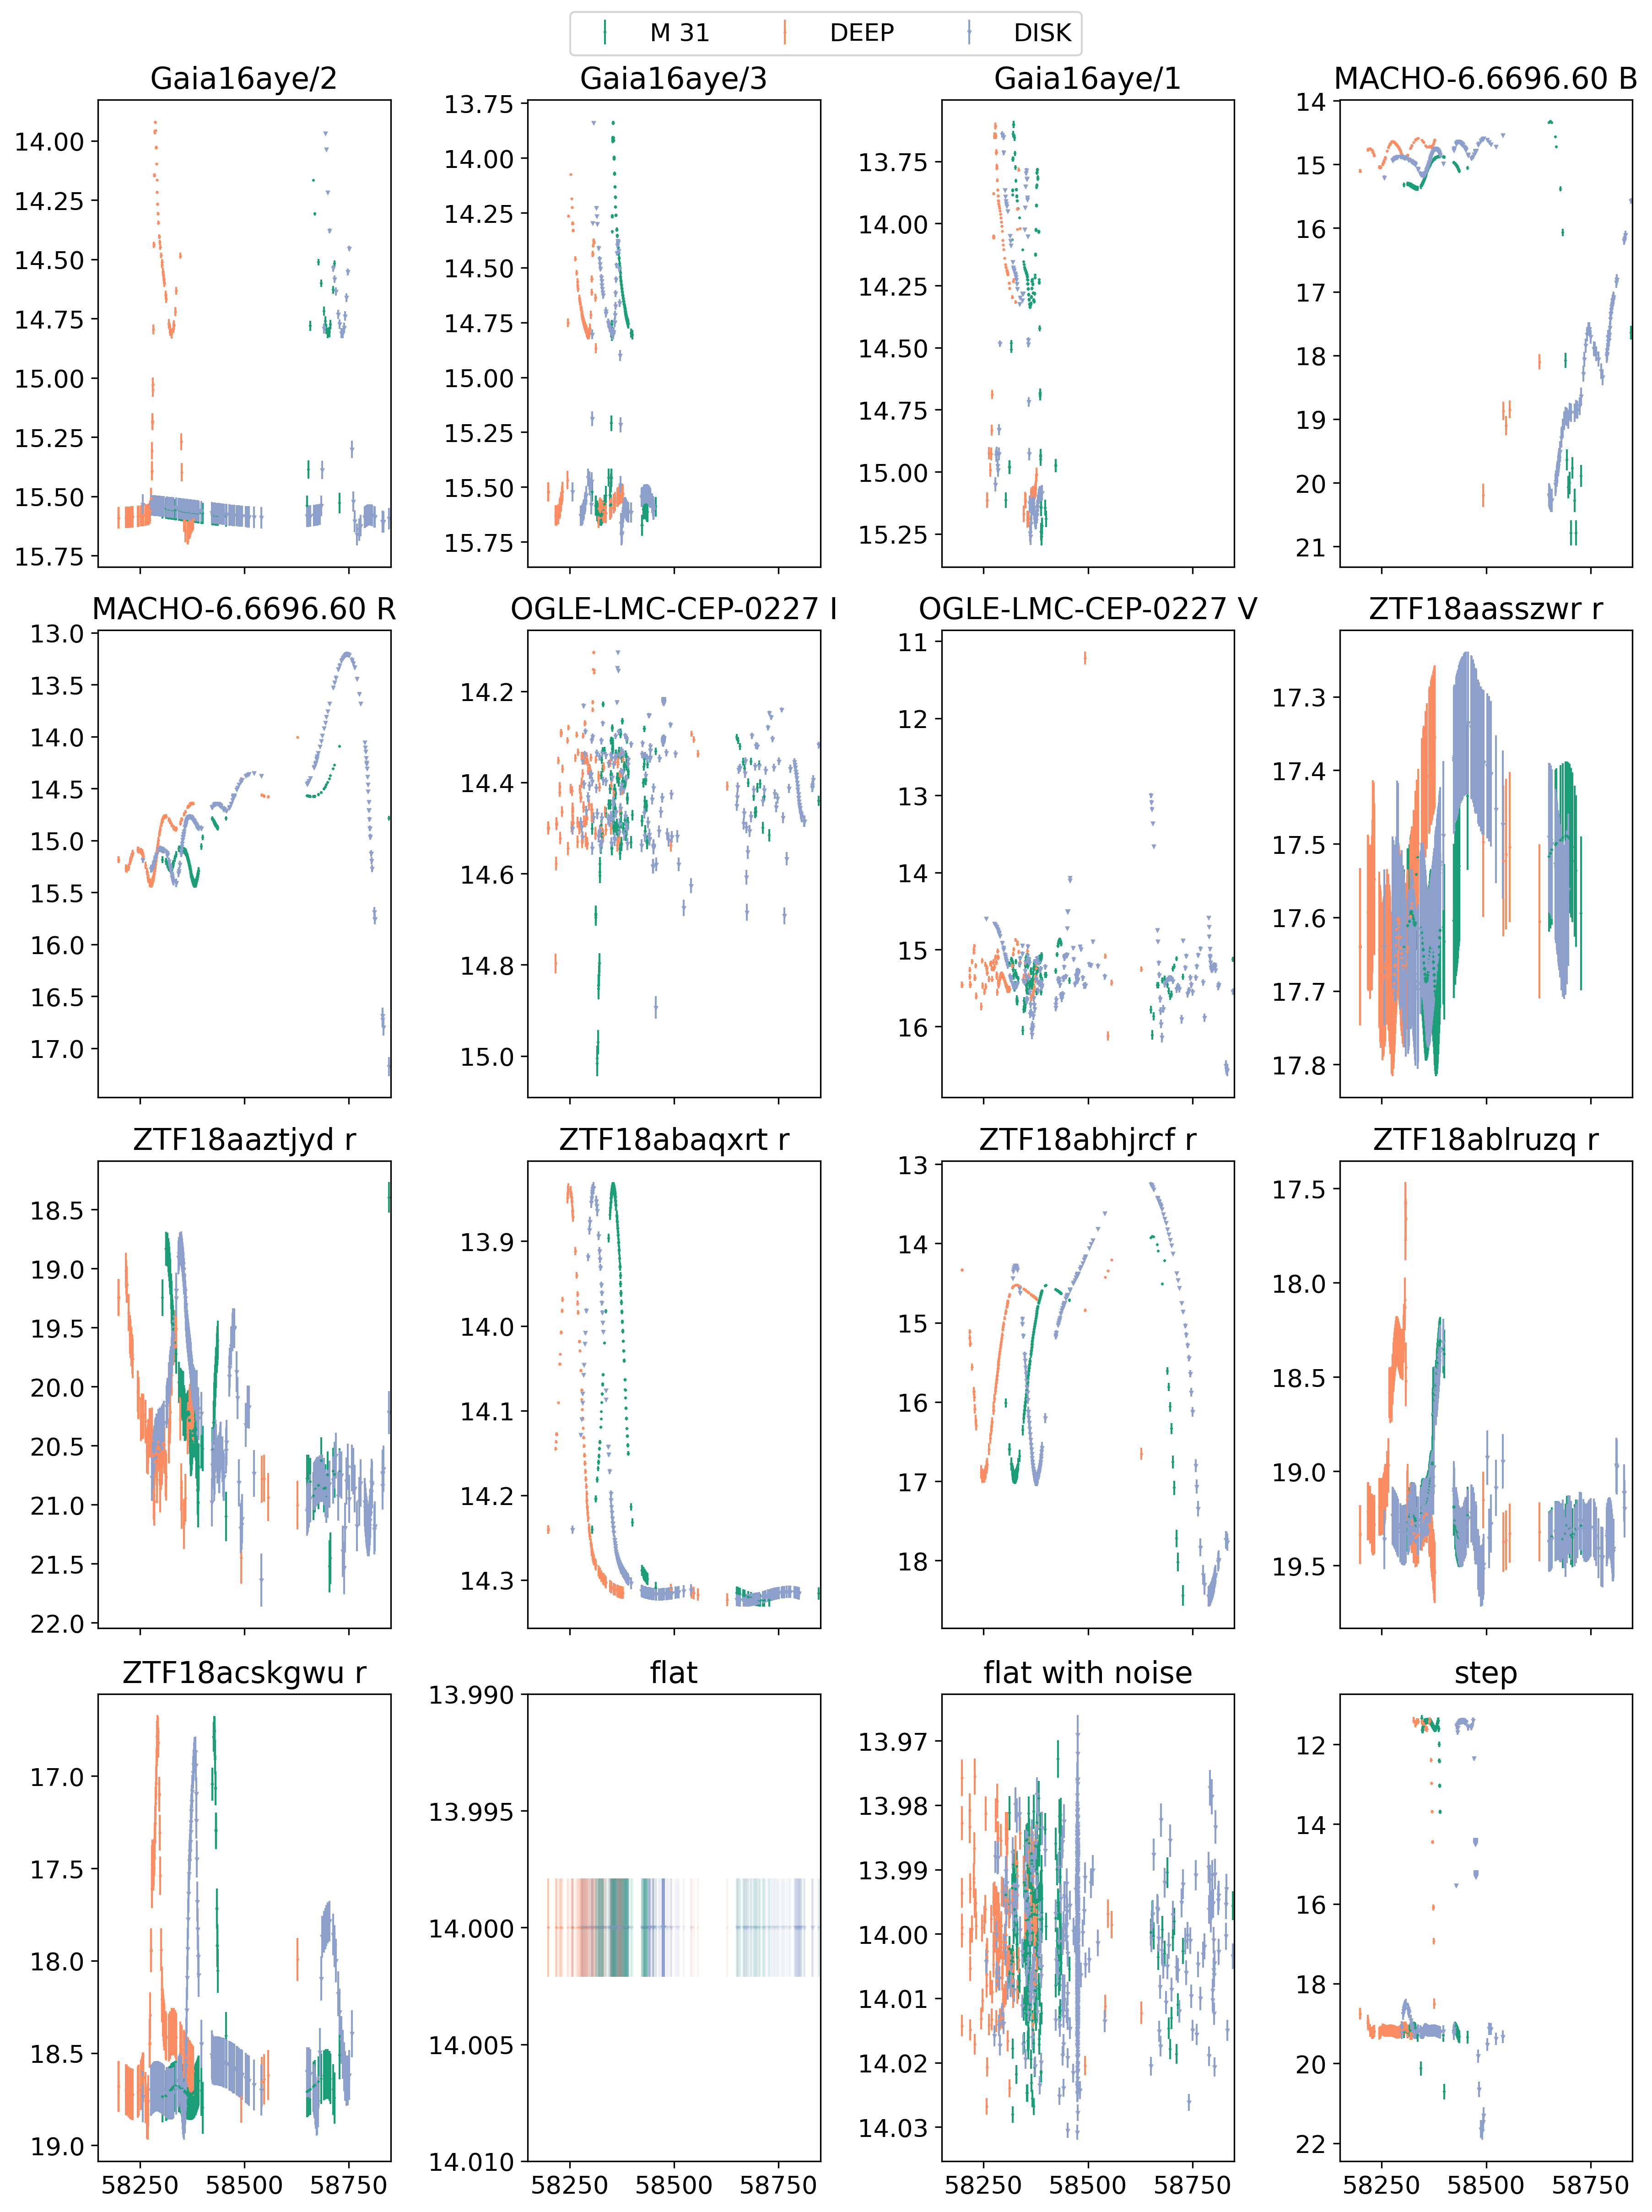

In [4]:
fig, ax_ = plt.subplots(4, 4, figsize=(12, 16), dpi=300, constrained_layout=True)
# plt.subplots_adjust(wspace=0.37)

for name, dirname, marker, color in [
    ('M 31', 'FID695', 'x', '#1b9e77'),
    ('DEEP', 'FID795', '*', '#fc8d62'),
    ('DISK', 'FID807', 'v', '#8da0cb'),
]:
    folder = os.path.join(DATA_ROOT, dirname)
    plot_field(field=name, folder=folder, ax_=ax_, marker=marker, color=color)
fig.suptitle(' ')  # Make empty space for the legend
fig.legend(loc='upper center', ncol=3)
fig.savefig('../figs/fakes_lc.pdf')